## PBL(1): Individual Project Work

1. https://agtechresearch.pythonanywhere.com/ 에 접속하여 회원가입해 주세요. (비밀번호는 단순하게 만드는 것을 권장. 예: 1234)
2. `username` 에 이메일 형식의 아이디를 기입해 주세요.
3. `password` 에 비밀번호를 기입해 주세요.

In [34]:
project = "housingprice"  # 수정하지 마세요
username = "g4312@naver.com"  # 회원가입 시 사용한 이메일아이디 (예시. abc@hello.com)
password = "1234"  # 비밀번호

리더보드 제출을 위한 기본 설정: 아래 코드를 실행해주세요.


In [35]:
import os
import urllib.request

if not os.path.exists("competition.py"):
    url = "https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/competition/competition.py"
    filename = "competition.py"
    urllib.request.urlretrieve(url, filename)

아래 코드를 실행하여 데이터를 다운로드 받습니다: 3개의 csv 파일이 data 폴더에 다운로드됨

 * dataset.csv: 과거 주택매매 데이터 -> 학습에 사용할 데이터셋
 * problem.csv: 현재 A사가 매매를 고려하고 있는 130건의 주택정보 -> ML 모델에 의하여 예측을 수행하여야 할 데이터셋
 * submission.csv: 리더보드 서버 제출을 위한 파일 형식


In [36]:
import competition

# 파일 다운로드
competition.download_competition_files(project)

100%|██████████| 141k/141k [00:00<00:00, 347kiB/s] 


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# Data 경로 설정
DATA_DIR = "data"

In [38]:
# 학습에 사용할 과거 주택매매 data set 로드 (dataset.csv)
dataset = pd.read_csv(os.path.join(DATA_DIR, "dataset.csv"))

# problem set 로드 (problem.csv)
problemset = pd.read_csv(os.path.join(DATA_DIR, "problem.csv"))

In [39]:
# 변수가 24개가 있으므로, 모든 변수를 출력하려면 다음과 같이 설정해야 함
pd.options.display.max_columns = 30

dataset  # 학습에 사용할 과거 주택매매 데이터셋 확인: 1340건의 과거 주택매매 데이터셋

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500
1,2,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500
2,3,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500
3,4,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000
4,5,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500
1336,1337,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125
1337,1338,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500
1338,1339,9600,Pave,Inside,5,7,1940,1950,728,976,332,1308,1,1,2,1,7,2,Detchd,1940.0,1,256,2009,160000


In [40]:
# problem set 확인: 130건의 문제 데이터셋 (SalePrice를 예측해야 함)
problemset

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1341,11200,Pave,Inside,5,5,1965,1965,1040,1040,0,1040,1,0,3,1,5,0,Detchd,1965,1,384,2008
1,1342,7200,Pave,Corner,5,7,1951,2000,900,900,0,900,1,0,3,1,5,0,Detchd,2005,2,576,2010
2,1343,16905,Pave,Inside,5,6,1959,1959,1350,1328,0,1328,1,1,2,1,5,2,Attchd,1959,1,308,2007
3,1344,9180,Pave,CulDSac,5,7,1983,1983,840,884,0,884,1,0,2,1,5,0,Attchd,1983,2,504,2007
4,1345,7200,Pave,Inside,5,7,1920,1996,530,581,530,1111,1,0,3,1,6,0,Detchd,1935,1,288,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1466,11478,Pave,Inside,8,5,2007,2008,1704,1704,0,1704,2,0,3,1,7,1,Attchd,2008,3,772,2010
126,1467,16321,Pave,CulDSac,5,6,1957,1997,1484,1600,0,1600,1,0,2,1,6,2,Attchd,1957,1,319,2006
127,1468,6324,Pave,Inside,4,6,1927,1950,520,520,0,520,1,0,1,1,4,0,Detchd,1920,1,240,2008
128,1469,8500,Pave,Inside,4,4,1920,1950,649,649,668,1317,1,0,3,1,6,0,Detchd,1920,1,250,2008


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1340 non-null   int64  
 1   LotArea       1340 non-null   int64  
 2   Street        1340 non-null   object 
 3   LotConfig     1340 non-null   object 
 4   OverallQual   1340 non-null   int64  
 5   OverallCond   1340 non-null   int64  
 6   YearBuilt     1340 non-null   int64  
 7   YearRemodAdd  1340 non-null   int64  
 8   TotalBsmtSF   1340 non-null   int64  
 9   1stFlrSF      1340 non-null   int64  
 10  2ndFlrSF      1340 non-null   int64  
 11  GrLivArea     1340 non-null   int64  
 12  FullBath      1340 non-null   int64  
 13  HalfBath      1340 non-null   int64  
 14  BedroomAbvGr  1340 non-null   int64  
 15  KitchenAbvGr  1340 non-null   int64  
 16  TotRmsAbvGrd  1340 non-null   int64  
 17  Fireplaces    1340 non-null   int64  
 18  GarageType    1259 non-null 

In [42]:
problemset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            130 non-null    int64 
 1   LotArea       130 non-null    int64 
 2   Street        130 non-null    object
 3   LotConfig     130 non-null    object
 4   OverallQual   130 non-null    int64 
 5   OverallCond   130 non-null    int64 
 6   YearBuilt     130 non-null    int64 
 7   YearRemodAdd  130 non-null    int64 
 8   TotalBsmtSF   130 non-null    int64 
 9   1stFlrSF      130 non-null    int64 
 10  2ndFlrSF      130 non-null    int64 
 11  GrLivArea     130 non-null    int64 
 12  FullBath      130 non-null    int64 
 13  HalfBath      130 non-null    int64 
 14  BedroomAbvGr  130 non-null    int64 
 15  KitchenAbvGr  130 non-null    int64 
 16  TotRmsAbvGrd  130 non-null    int64 
 17  Fireplaces    130 non-null    int64 
 18  GarageType    130 non-null    object
 19  GarageYr

In [43]:
# describe 소수점 2자리에서 반올림
bigbox = dataset.describe().round(2)
bigbox

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
count,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1340.00,1259.00,1340.00,1340.00,1340.00,1340.00
mean,670.50,10394.69,6.09,5.58,1971.04,1984.71,1053.47,1160.04,343.44,1508.73,1.56,0.38,2.87,1.05,6.52,0.61,1978.36,1.75,468.72,2007.81,179731.31
std,386.97,9390.13,1.38,1.11,30.17,20.65,442.47,386.18,433.18,523.05,0.55,0.50,0.82,0.23,1.63,0.64,24.62,0.76,215.18,1.33,78153.43
min,1.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,2006.00,34900.00
25%,335.75,7500.00,5.00,5.00,1953.75,1966.75,794.00,882.00,0.00,1121.75,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,319.50,2007.00,129500.00
50%,670.50,9468.50,6.00,5.00,1972.00,1993.00,986.50,1083.50,0.00,1456.00,2.00,0.00,3.00,1.00,6.00,1.00,1979.00,2.00,476.50,2008.00,161250.00
75%,1005.25,11515.50,7.00,6.00,2000.00,2004.00,1291.50,1383.00,728.00,1775.25,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,2009.00,213000.00
max,1340.00,215245.00,10.00,9.00,2010.00,2010.00,6110.00,4692.00,1872.00,5642.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,2010.00,755000.00


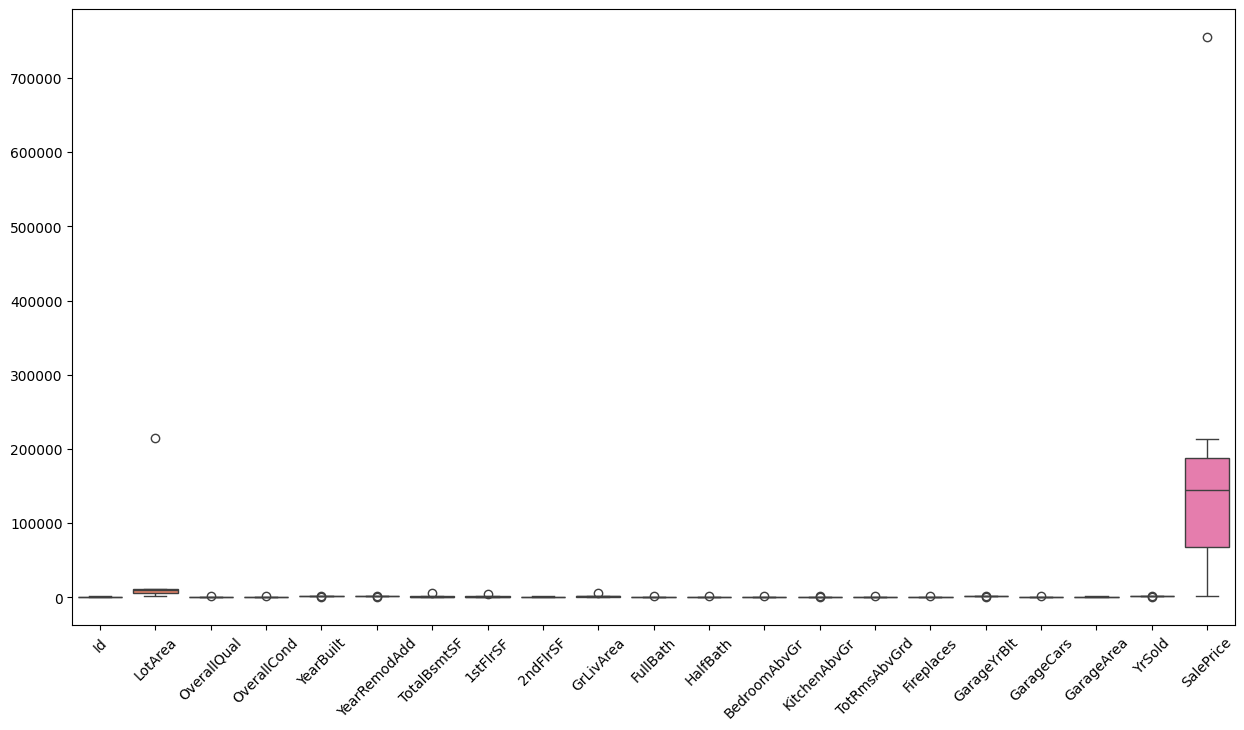

In [44]:
# bigbox의 boxplot 그려보기
plt.figure(figsize=(15, 8))
sns.boxplot(data=bigbox)
plt.xticks(rotation=45)
plt.show()


### 스케일 차이가 엄청나다 일단 보니 서로 비교해보는 것은 어려워 보인다

<Axes: >

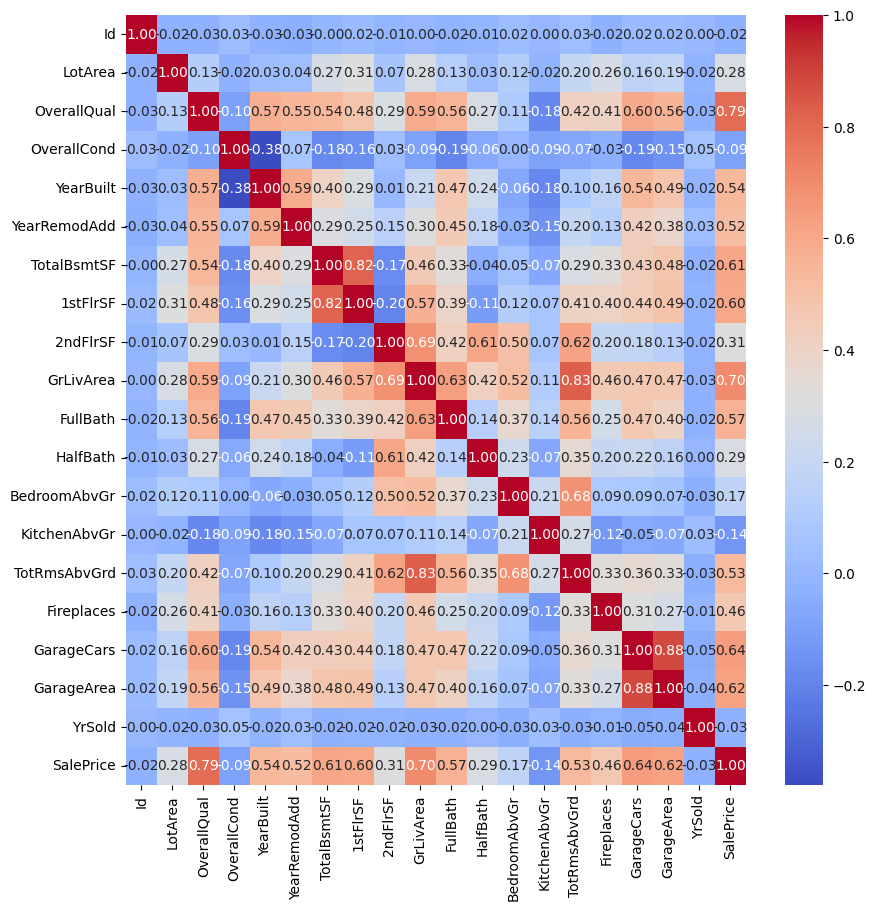

In [45]:
# int 칼럼만 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.select_dtypes(include=["int"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")


id는 쓸모 없다

In [46]:
# object 칼럼 value_counts() 출력
for col in dataset.select_dtypes(include=["object"]).columns:
    print(f"{col} : {dataset[col].value_counts()}")
    print()
    

Street : Street
Pave    1336
Grvl       4
Name: count, dtype: int64

LotConfig : LotConfig
Inside     969
Corner     239
CulDSac     87
FR2         43
FR3          2
Name: count, dtype: int64

GarageType : GarageType
Attchd     790
Detchd     355
BuiltIn     81
Basment     19
CarPort      9
2Types       5
Name: count, dtype: int64



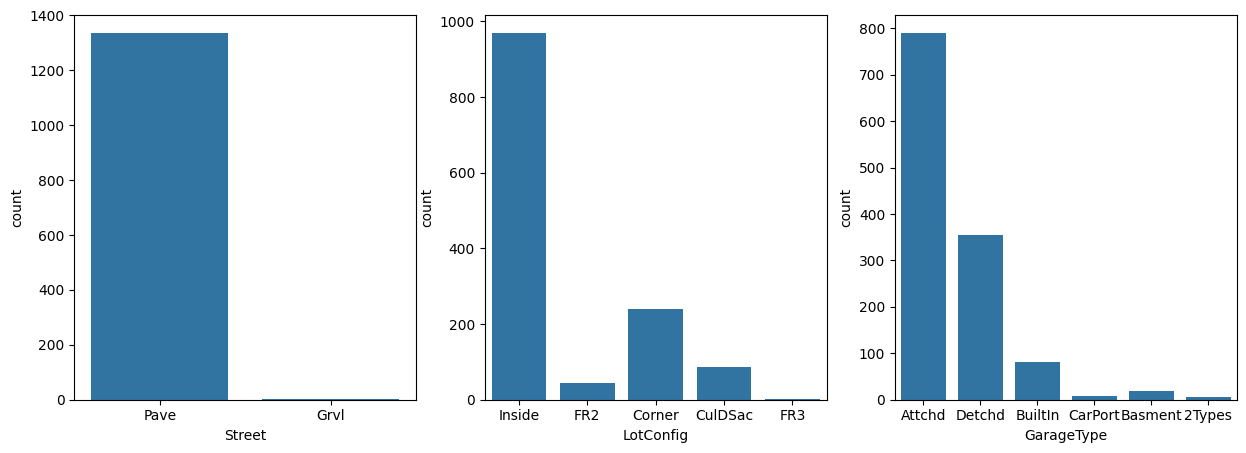

In [47]:
# Street, LotConfig, GarageType의 pieplot 그리기
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=dataset, x="Street", ax=ax[0])
sns.countplot(data=dataset, x="LotConfig", ax=ax[1])
sns.countplot(data=dataset, x="GarageType", ax=ax[2])
plt.show()

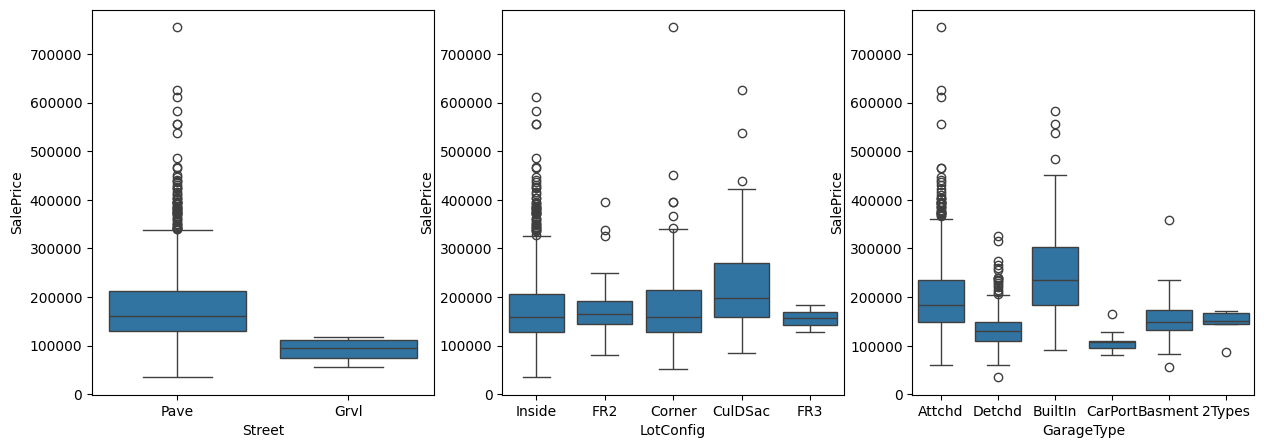

In [48]:
# object 칼럼 SalePrice와의 관계 그래프 그리기
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=dataset, x="Street", y="SalePrice", ax=ax[0])
sns.boxplot(data=dataset, x="LotConfig", y="SalePrice", ax=ax[1])
sns.boxplot(data=dataset, x="GarageType", y="SalePrice", ax=ax[2])
plt.show()

In [49]:
# Street 칼럼의 카테고리에 따른 SalePrice의 평균값 출력
# LotConfig 칼럼의 카테고리에 따른 SalePrice의 평균값 출력
# Garagetype 칼럼의 카테고리에 따른 SalePrice의 평균값 출력
print(dataset.groupby("Street")["SalePrice"].mean())
print(dataset.groupby("LotConfig")["SalePrice"].mean())
print(dataset.groupby("GarageType")["SalePrice"].mean())



Street
Grvl     91373.250000
Pave    179995.858533
Name: SalePrice, dtype: float64
LotConfig
Corner     177247.769874
CulDSac    222818.126437
FR2        177814.534884
FR3        155950.000000
Inside     176609.536636
Name: SalePrice, dtype: float64
GarageType
2Types     144200.000000
Attchd     201430.363291
Basment    160570.684211
BuiltIn    259238.802469
CarPort    109962.111111
Detchd     134032.191549
Name: SalePrice, dtype: float64


Street - Pave , Lotconfig - CulDSac, GarageType - BuiltIn일때 가장 높다

In [50]:
## 데이터 전처리
### 결측치 채우기

In [51]:
#dataset 결측치 확인
dataset.isnull().sum()

Id               0
LotArea          0
Street           0
LotConfig        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageYrBlt     81
GarageCars       0
GarageArea       0
YrSold           0
SalePrice        0
dtype: int64

In [52]:
# probelmset 결측치 확인
problemset.isnull().sum()


Id              0
LotArea         0
Street          0
LotConfig       0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
YrSold          0
dtype: int64

In [53]:
# garatype과 garagebulit 의 결측치 값들이 같은 위치에 있는지 확인해보기
print(dataset[dataset["GarageType"].isnull()]["GarageYrBlt"].isnull().sum())

81


##### 결측치가 있는 값들이 같은 위치에 있다! 그러면 이건
##### 그러면 이건 결측치가 아니라 새로운 변수로 만들어주는건 어때? 
##### GarageType은 NO Garage로, GarageYrBlt의 값은 0으로 대체

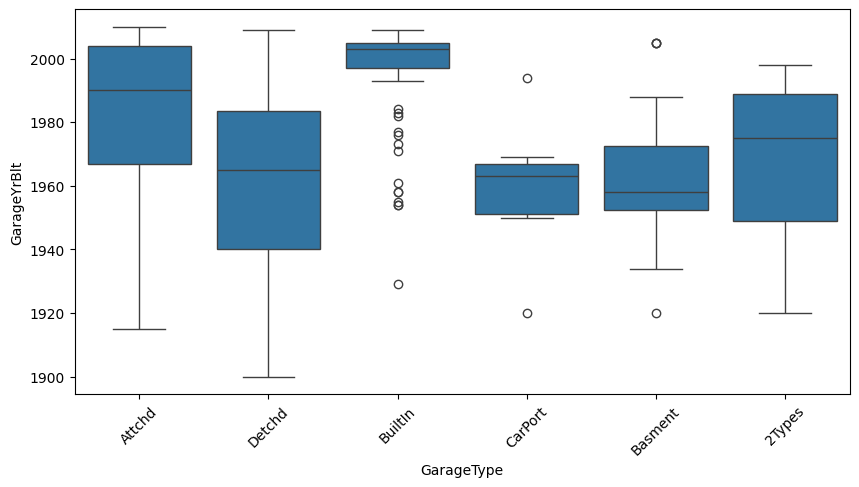

In [54]:
# garatype과 garagebulit 관계 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x="GarageType", y="GarageYrBlt")
plt.xticks(rotation=45)
plt.show()



In [55]:
# # 결측치가 있다면 GarageType은 NO Garage로, GarageYrBlt의 값은 0으로 대체
# dataset["GarageType"].fillna("No Garage", inplace=True)
# dataset["GarageYrBlt"].fillna(0, inplace=True)

# dataset.isnull().sum()
